# Observações para a entrega do Trabalho
    
    Como o professor havia me alertado, esse projeto realmente é imenso e abre uma gama de possibilidades quase infinita. Por conta do prazo de entrega, encerrarei aqui. No entanto, este projeto estará no github, e minha meta é continuar, pois esse último problema que deixei em aberto me interessou bastante. Para todos os colegas que leram o projeto, e quiserem comentar, dar push, tirar dúvidas, sintam-se a vontade de entrar em contato comigo, será um prazer auxiliá-lo.
    As minhas informações pessoais como DRE serão deixadas apenas no arquivo tar.gz entregue, não o colocarei aqui no git.
    
    Outro ponto que preciso mencionar é o de que não cumpri com todas as promessas de desenvolver os softwares em pedaços, funcionando parcialmente. Então recomendo fortemente que, para haver interação com meu projeto, use a ferramenta do jupyter notebook junto com as bibliotecas abaixo listadas:
    Tkinter
    Numpy
    Matplotlib

# Drawing Predictor

    Esse é o meu projeto final para a disciplina de Cáculo Numérico ministrada pelo Professor João Antonio Recio da Paixão no DCC-UFRJ em 2017.2 . O projeto era de livre escolha dos alunos, bastando apenas encaixar os métodos numéricos aprendidos em aula no problema a que fomos propostos em resolver. 
    O meu projeto consiste num preditor de desenhos, cujo objetivo é identificar o desenho realizado pelo usuário para que, então, possam ser corrigidas as imperfeições. Por exemplo, desenhar uma reta com um mouse não é um trabalho muito fácil, as chances de imperfeições são altas! No entanto, somos capazaes de entender que aquela reta, mesmo um pouco torta, é uma reta. Por que então o computador não prediz que o desenho era uma reta e então corrigi para um desenho de uma linha perfeita (algo que o computador faz muito bem).
    
   ## Motivo da escolha:
    
    Quando comecei a me interessar em Ciência de Dados e todos os seus ramos, encarei um problema ao tentar praticar o algoritmo de Regressão Linear: falta de dados bons e fáceis. Foi então que tive a ideia de gerar meus próprios dados! Nada melhor que um desenho, ou melhor, um conjunto de pares de pontos (x,y) com um forte apelo visual que facilitam a visualização dos dados e avaliação do modelo utilizado.
    
   ## Diretórios do projeto:
   
     Para facilitar o seu entendimento, particionei o projeto em 3 diretórios, dos quais:
     
   ### Dados
   
     Possui os dados que utilizarei aqui no notebook, além disso inclui uma ferramenta (coletor.py) que desenvolvi pra produzir os dados utilizados no estudo. Todos os dados foram produzidos no formato numpy, e consitem de um array contendo todos os pontos capturados no desenho pelo Coletor, ou seja, pares de (x, y) em um numpy array. Observe que este diretório está dentro do diretório Relatório, já que este será usado lá. 
     
   ### Relatório
   
     A princípio apenas conterá um notebook (este que está lendo), e algumas ferramentas semi-completas de tentativas com alguns métodos, para que você possa interagir com o projeto.
     
   ### Software
   
     Como o projeto final é predizer desenhos, a ferramenta final e os arquivos que lhe acompanham estarão neste diretório. Note que as conclusões e o desenvolvimento numérico do projeto serão realizados no notebook, enquanto que no software apenas encontrará a implementação sem grandes explicações.

   ## Como funcionará o relatório
   
     Infelizmente não encontrei nenhuma forma de trazer o Canvas para o notebook, dessa forma, nossa interação será feita por meio de arquivos em python que deixarei neste diretório. No entanto, alguns dados que produzirei com o Coletor serão utilizadas e plotados aqui mesmo, então não é necessário interagir totalmente com os arquivos em python, apenas caso queira explorar melhor.

   ## Predizendo retas: acostumando-se com as manipulações
   
      Para iniciar, começarei com um desafio muito fácil: descrever a reta que melhor define um conjunto de pontos. Obviamente este método falha quando o usuário pretende desenhar curvas (o programa irá dizer uma reta, mas de fato não será uma boa predição). O método que utilizarei será o de mínimos quadrados. Dados um conjunto de pontos (x, y), quero descobrir a melhor reta y=Mx+C . Ou seja, meu objetivo é descobrir o melhor par (M, C) dado um conjunto de retas. Veja a seguir o exemplo que utilizarei e, finalmente, a primeira linha de código do notebook!

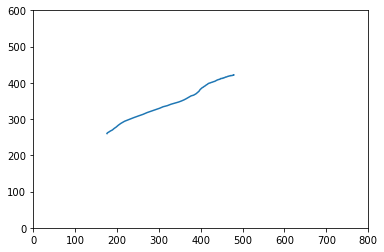

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.load("Dados/reta.npy")
dados_x = dados[:, 0]
dados_y = dados[:, 1]
plt.plot(dados_x, dados_y)
plt.axis([0, 800, 0, 600])
plt.show()

    Para utilizarmos o método, temos que representar a equação da reta por meio do sistema Ax = y. Dessa forma, A será uma matriz de duas colunas e N linhas, onde N representa o número de pontos. Na primeira coluna teremos todos os valores de x para os pontos. Na segunda coluna temos sempre a constante 1, pois C sempre será multiplicada por 1. Já na matriz x, teremos os valores que queremos descobrir, ou seja, as constantes M e C. Em y teremos cada um dos valores de y para os pontos. Adotemos [t] ao lado de uma matriz como sendo sua transposta, e [-1] como sendo sua inversa.
    Do método dos mínimos quadrados temos:
        A.x = y
        A[t].A.x = A[t].y
        x = (A[t].A)[-1].A[t].y
        
    Disso descobrimos como obter a melhor aproximação para a matriz x.

In [2]:
from numpy.linalg import inv
temp = []
for i in range(0, dados_x.shape[0]):
    temp.append(1)

A = np.column_stack((dados_x,np.array(temp)))
y = dados_y.transpose()
A_t = A.transpose()

reduzida = np.dot(A_t, A)
inv_reduzida = inv(reduzida)

x = np.dot(np.dot(inv_reduzida, A_t), y)
print(x)
M = x[0]
C = x[1]

[   0.52803338  171.62196491]


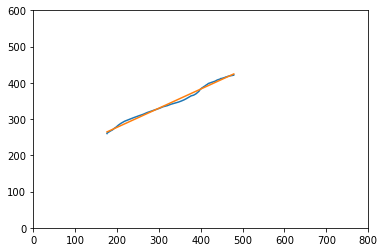

In [3]:
def reta(x):
    return M*x+C
x_min = x_max = dados_x[0]
for i in dados_x:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

plt.plot(dados_x, dados_y)
plt.plot(range(x_min, x_max+1), reta(range(x_min, x_max+1)))
plt.axis([0, 800, 0, 600])
plt.show()

   ## PredReta.py
   
    Finalmente temos a primeira versão do software para que você teste. Basta ir no diretório software e executar predReta.py . Lá, basta desenhar um conjunto de pontos e, ao apertar qualquer botão do teclado, ele irá predizer a melhor reta para descrever o desenho. Observe que nessa versão ainda deixo o registro do seu desenho, para que possa fazer comparações entre o resultado e o desenho. Algumas das falhas dessa versão:
    - Prediz somente retas
    - Algumas falhas pra predizer retas muito íngrimes, já que o intervalo de plot é determinado pelo intervalo de x no desenho, o que em desenhos íngrimes resulta em uma falha no range de y (que importa mais nesse caso)
    - Erro de execução caso todos os pontos desenhados possuam o mesmo valor de x

   ## Prevendo curvas com polinômios
   
       Para isso, vamos relembrar o método dos mínimos quadrados. Basicamente, tínhamos uma matriz A, com uma coluna tendo os valores de x nos pontos, e outra com 1 (x^0). Para expandirmos o método para um polinômio de grau N, basta colocarmos N+1 colunas. Onde cada nova coluna inserida seja um grau maior do valor de x naquele ponto. 
       A = [ [X^N, X^(N-1), X^(N-2)..., X^(1), X^(0)], ...]
       A matriz y continua a mesma, no entando, a matriz x, que é o resultado, terá dimensão N+1x1, que são os coeficientes do polinômio. Como pretendo aperfeiçoar um sistema para realizar interpolações, de início iremos trabalhar aceitando polinômios de grau 10 (para que várias curvas sejam aceitas), mas depois a pretensão é reduzir para no máximo grau 5 (embora creio que 2 já seja suficiente, mas isso deixaremos pra discutir depois).
       
       Vamos ao trabalho! Primeiro, gostaria de apresentar os desenhos que iremos usar nesse etapa.

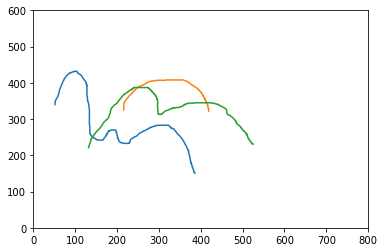

In [4]:
dados = np.load("Dados/polinomio.npy")
dados_x = dados[:, 0]
dados_y = dados[:, 1]
plt.plot(dados_x, dados_y)

dados = np.load("Dados/semi_circ.npy")
dados_x = dados[:, 0]
dados_y = dados[:, 1]
plt.plot(dados_x, dados_y)

dados = np.load("Dados/pao_acucar.npy")
dados_x = dados[:, 0]
dados_y = dados[:, 1]
plt.plot(dados_x, dados_y)

plt.axis([0, 800, 0, 600])
plt.show()

    A primeira coisa importante a se entender é: estou desenhando mal apenas para que o computador possa aperfeiçoar, pois sou um talentoso artista com mãos habilidosas.
    
    Descrevendo um pouco melhor as curvas, a azul se trata literalmente de um polinômio, a laranja de uma semi-circunferência (pois quero ver o quão bom uma curva pode ser representada sem o uso de raiz) e finalmente a curva mais "prática" até agora. No rabisco verde minha intenção era representar essa imagem:
    
 ![alt text](pao_acucar.jpg "Pão de Açúcar")
 
     Sem mais delongas vamos definir o método!

In [5]:

def pred_polinomio(dados, n): #conjunto de pontos, grau do polinômio
    temp = []
    for i in range(0, n+1):
        temp.append([])
    for i in range(0, n+1):
        for j in range(0, dados.shape[0]):
            temp[i].append(dados[j, 0]**i)

    A = np.array(temp).transpose()
    y = dados[:, 1].transpose()
    A_t = np.array(temp)

    reduzida = np.dot(A_t, A)
    inv_reduzida = inv(reduzida)
    
    x = np.dot(np.dot(inv_reduzida, A_t), y)
    return x

def calc_polinomio(x, coef):
    result = 0
    for i in range(0, coef.shape[0]):
        result+= np.power(x, i) * coef[i]
    return result

    Peço agora sua interação com o projeto, marquei com #1 e #2 as linhas que gostaria que fossem alteradas por você, para que veja os resultados produzidos. Aqui vão as opções possíveis: 
    #1 -> "Dados/polinomio.npy" ou "Dados/semi_circ.npy" "Dados/pao_acucar.npy" "Dados/reta.npy"
    #2 -> o grau do polinômio
    
    Ah, e para excutar uma célula, basta apenas apertar ctrl+enter, depois de selecioná-la

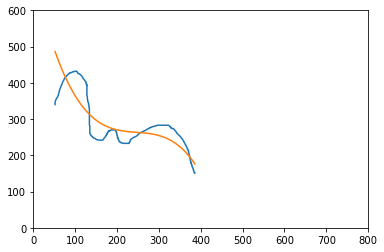

In [6]:
dados = np.load("Dados/polinomio.npy") #1
coef = pred_polinomio(dados, 3) #2

x_min = x_max = dados[0,0]
for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)
plt.plot(dados[:, 0], dados[:, 1])
plt.plot(range(x_min, x_max+1), calc_polinomio(range(x_min, x_max+1), coef))
plt.axis([0, 800, 0, 600])
plt.show()


    Confesso que agora fui surpreendido com a ineficiência do método para graus elevados. Pelo que pesquisei, para buscar eficiência, a biblioteca numpy limita suas operações a números de no máximo 64 bits, como não suporta Bigintegers, e os números variam entre 0 800, basta ver que 800**5 ~= 10**14, dessa forma levando em conta ainda as operaçãoes de inversa na matriz e produtos matricias, o limite deve estourar e a precisão deve ser perdida. Ao que parece, polinômios com grau maior que 4 são inviáveis por conta da capacidade computacional (e não por causa da complexidade de tempo, como havia pensado!).
    
    Desse experimento conclui que a interpolação será mais necessária do que havia pensado. Além de ficar bem desapontado de não obter um resultado satisfatório para o desenho do pão de açúcar (agora temos uma meta para o decorrer do projeto!).
    
    Uma última tentativa, ainda em cima da abordagem de um polinômio de grau alto, sugerida pelo meu amigo Thiago Henrique, também aluno da disciplina, é a de reduzir a ordem de grandeza do material de input. Basicamente, o material acaba se tornando float de 64 bits durante as operações matriciais. Ou seja, temos um tipo com ordem de grandeza máxima reduzida, mas que oferece a capacidade de reduzir seu tamanho. Dessa forma, dividirei todos os valores por 100, tanto os de x quanto os de y. Para reconverter essa função g(x) que tem ordem de grandeza menor que a original f(x), basta pensarmos que:
    g(x) = i.x²+j.x+k (dimensões reduzidas em 100)
    f(x) = a.x²+b.x+c
    100*g(x/100) = f(x) 
    (i.100^-1).x²+(j).x+(100.k) = a.x²+b.x+c
    Logo, o coeficiente de x^n será multiplicado por 100^(1-n)

[  6.52568971e+03  -1.51834934e+02   1.42167066e+00  -6.60803950e-03
   1.62889517e-05  -2.03812628e-08   1.01822937e-11]


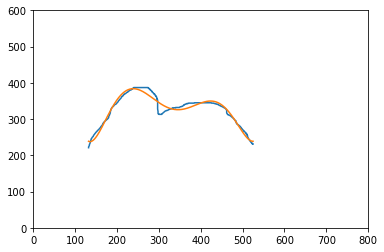

In [7]:
def resize_coef(coeficientes, cte):
    temp = cte
    for i in range(0, coeficientes.shape[0]):
        coeficientes[i] = coeficientes[i]*cte
        cte = cte/temp
    return coeficientes
dados = np.load("Dados/pao_acucar.npy") 
coef = pred_polinomio(dados.astype(float)/100, 6) #reduzindo a ordem de grandeza de dados em 100
#print(dados.astype(float)/100)
resize_coef(coef, 100) #coef é passado como referência
print(coef)

x_min = x_max = dados[0,0]
for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

plt.plot(dados[:, 0], dados[:, 1])
plt.plot(range(x_min, x_max+1), calc_polinomio(range(x_min, x_max+1), coef))
plt.axis([0, 800, 0, 600])
plt.show()

def pred_polinomio(dados, n): #conjunto de pontos, grau do polinômio
    temp = []
    dados_ = dados.astype(float)/100
    for i in range(0, n+1):
        temp.append([])
    for i in range(0, n+1):
        for j in range(0, dados_.shape[0]):
            temp[i].append(dados_[j, 0]**i)

    A = np.array(temp).transpose()
    y = dados_[:, 1].transpose()
    A_t = np.array(temp)

    reduzida = np.dot(A_t, A)
    inv_reduzida = inv(reduzida)
    
    x = np.dot(np.dot(inv_reduzida, A_t), y)
    return resize_coef(x, 100)


    A sugestão de fato funcionou! Antes o que no máximo era representado em um polinômio de grau 3 agora pode ser representado por um de grau 6. Tentei dividir também por 1000, para ver se aumentava ainda mais o grau máximo, mas não obtive sucesso. No entanto, para um desenho, a suavidade de uma parábola já é suficente aos olhos humanos. Então temos de mudar nossos objetivos.
    A abordagem agora será: repartir o desenho em pequenos pedaços de grau no máximo 3 (ou 2, ainda não decidi). Como já deve estar pensando, agora temos uma gama nova de problemas a serem trabalhados. O primeiro que penso segue o próximo parágrafo. 
    Ao recebermos um material de input, iremos repartir em pedacinhos, interpolá-los em vários polinômios de no máximo grau 2. Mas como avaliar qual melhor grau de polinômio para um dado pedacinho? Será que sempre interpolar em polinômios de grau maior é melhor? 
    Para o estudo que segue, iremos usar os desenhos reta.npy e semi_circ.npy

   ### Função erro 
       
       Usaremos a função erro(x,y,f(x)) que realiza o somatório dos quadrados da diferença entre o f(x) predito e o y correto, para podermos mensurar o quão preciso é o nosso método.
       
  
       

In [8]:
def erro(x_, y_, f):
    soma = 0
    for i in range(x_.shape[0]):
        soma+= (y_[i]-f(x_[i]))**2
    return soma/x_.shape[0]

   ### Casos de teste e treino
   
       Para realizar a avaliação sobre o quão eficiente é uma predição, não podemos avaliar com o mesmo conjunto do qual usamos para modelar a equação. Não irei debater muito sobre, pois já é um assunto saturado na ciência de dados, apenas gostaria que soubesse que quebrarei o conjunto de pontos em um pedaço de treino e outro de teste para avaliar. (Dado um conjunto, 80% será conjunto de treino e 20% conjunto de teste)

In [9]:
def test_train(dados):
    lista = []
    for i in dados:
        lista.append(i)
    randomico = np.array(lista)
    np.random.shuffle(randomico)
    return randomico[0:int(0.8 * randomico.shape[0]), :], randomico[int(0.8 * randomico.shape[0]):randomico.shape[0], :]
#retorne dados_treino, dados_teste

   ### Polinômios de primeiro grau vs de n-ésimo grau
   
   Já que iremos trabalhar com interpolações, num caso geral, toda curva será descrita por pequenas retas e parábolas. Os testes que seguem avaliarão qual o erro calculado para as predições dos desenhos: reta_1.npy... reta_5.npy e curva_1.npy... curva_5.npy . As dúvidas que quero sanar com esses testes são: 
   - será que até mesmo nas retas eu posso usar um polinômio de grau máximo pra desenhar? 
   - Ou devo optar pela reta?
   - Quando optar pela reta e quando optar pela curva    

Essa será uma análise interativa, você escolhe o dado para testar! Para alterar o desenho, mude a string para curva_x.npy ou reta_x.npy (x de 0 a 5)

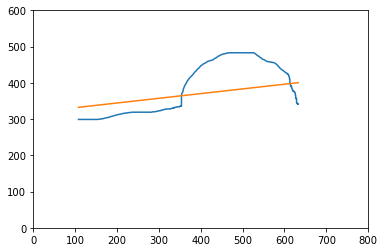

Erro do polinomio de grau 1 :  2601.74107807


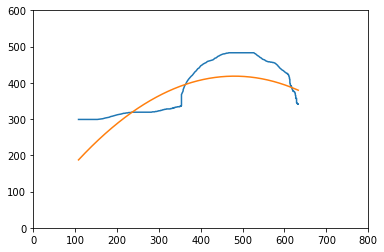

Erro do polinomio de grau 2 :  1657.09385536


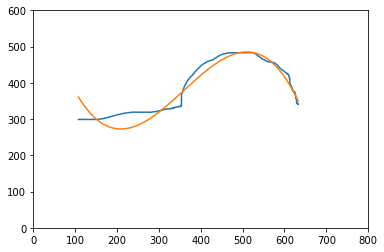

Erro do polinomio de grau 3 :  341.030035488


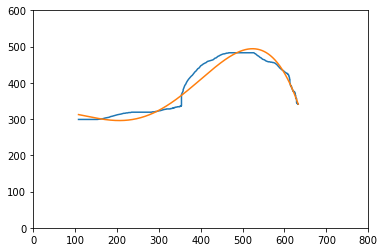

Erro do polinomio de grau 4 :  208.854769875


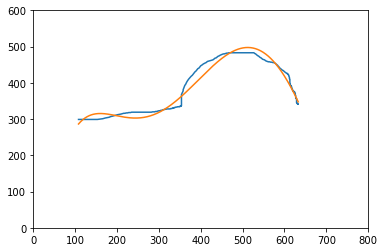

Erro do polinomio de grau 5 :  181.203448644


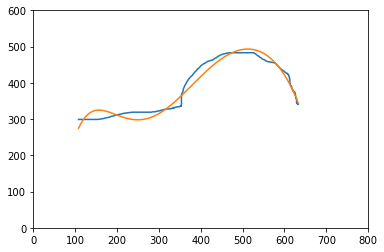

Erro do polinomio de grau 6 :  179.527416981


In [10]:
dados = np.load("Dados/foice.npy") 
dados_treino, dados_teste = test_train(dados)
x_min = x_max = dados[0,0]

for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)


for l in range(1, 7):
    coef = pred_polinomio(dados_treino, l) 
    plt.figure(l)
    plt.axis([0, 800, 0, 600])
    plt.plot(dados[:, 0], dados[:, 1])
    plt.plot(range(x_min, x_max+1), calc_polinomio(range(x_min, x_max+1), coef))
    plt.show()
    def calc_(x):
        return calc_polinomio(x, coef)
    print("Erro do polinomio de grau", l, ": ",erro(dados_teste[:, 0], dados_teste[:, 1],calc_ ))


In [48]:
def resolve_pol(dados, k): 
    grau = 1
    dados_treino, dados_teste = test_train(dados)

    x_min = x_max = dados[0,0]
    for i in dados[:, 0]:
        x_min = min(x_min, i)
        x_max = max(x_max, i)

    plt.axis([0, 800, 0, 600])
    #plt.plot(dados[:, 0], dados[:, 1])
    #plt.show()
    
    
    coef_sol = []
    err_sol = 10000000
    err_ = 0
    anterior = 0
    for l in range(1, k+1):
        coef = pred_polinomio(dados_treino, l) 
        if(l==1):
            coef_sol = coef
        def calc_(x):
            return calc_polinomio(x, coef)
        anterior = err_
        err_ = erro(dados_teste[:, 0], dados_teste[:, 1],calc_ )
        if(abs(err_-anterior) > 70 and err_< err_sol):
            coef_sol = coef
            err_sol = err_
    plt.plot(range(x_min, x_max+1), calc_polinomio(range(x_min, x_max+1), coef_sol))
    #plt.show()


    Dos dados obtidos, observei que, toda vez em que a diferença entre o erro do polinomio de grau n e n+1 era inferior a 70-100, o ajuste não era necessário, ou seja, tiínhamos apenas um overfit. Dessa forma, o algoritmo que determina o melhor grau n do polinômio para um certo dado é:
    
    grau = 1
    for i in range(2, 7):
        if(abs(erro(polinomio(i-1))-erro(polinomio(i))) > 70):
            grau = i
            
    Ou seja, o grau do polinômio que melhor descreve é dado pela última redução brusca de erro calculado.
    
    Agora vamos lá, temos uma maneira de decidir o melhor polinômio para dado um trecho de curva. O nosso problema agora é: pedaços diferentes possuem comportamentos polinomiais diferentes. Vou exemplificar melhor com o desenho de uma foice.
    
   ![alt text](foice.jpg "Foice")
   
    Observe que seu cabo possui o comportamento de uma reta, enquanto que a parte metálica possui o comportamente de uma curva, mais especificamente de uma semi-circunferencia (lembrando que conseguimos representar uma semi-circunferencia de maneira aceitável com polinomios). Outro ótimo exemplo foi a imagem do pão de açúcar, se você lembra bem, no meu desenho feito a mão, o polinômio não conseguiu descrever perfeitamente a concavidade entre os dois morros. No entanto, teríamos uma solução ideal se representássemos com duas parábolas.
    
    
    

   ## Como identificar mudanças de comportamento?
    
    Bem, se assim como eu, você pensou em derivada, fico feliz de não ser o único! O único problema que teremos é o de representar derivadas de grau maior que 1. A razão se dá pelos pontos captados não possuirem um intervalo constate h. Veja a seguir o desenho da foice, exibindo apenas os pontos captados:
    

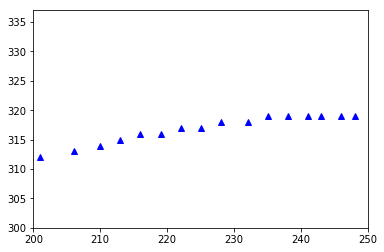

In [12]:
dados = np.load("Dados/foice.npy") 
#vou imprimir apenas um intervalo da função para que fique bem visível os pontos captados
plt.axis([200, 250, 300, 337])
plt.plot(dados[:, 0], dados[:, 1], "b^")
plt.show()

    Para derivadas de grau 1, faremos (f(x+h)-f(x))/h, correto? Mas quando usamos o método de diferenças finitas para derivadas discretas em grau maior que 1, temos que assumir que o h, ou seja, o intervalo x entre os pontos, é contante, o que de fato não é! 
    Pesquisando um pouco em fóruns (https://scicomp.stackexchange.com/questions/480/how-can-i-numerically-differentiate-an-unevenly-sampled-function) e bibliografias encontrei o método de Fornberg para diferenças finitas arbitrárias. Como não consegui entender sua implementação, preferia partir para uma sugestão mais manual. A ideia segue do seguinte artigo: https://mathformeremortals.wordpress.com/2013/01/12/a-numerical-second-derivative-from-three-points/
    
    A ideia proposta é bem simples, o que faremos é um certo tipo de recursão para a derivada, de forma a tratar cada intervalo h de x separadamente. Ou seja, se na derivada de primeira ordem e fazia a diferença discreta entre dois pontos, na de segunda derivada eu farei a diferença entre 2 derivadas de primeira ordem obtidas de maneira discreta. Imaginem 3 pontos, x1, x2 e x3. A segunda derivada de x1 será:
    f''(x1) = (f'(x2)-f'(x1))/(x2-x1)
    onde f'(x2) = (f(x3)-f(x2))/(x3-x2)
    e    f'(x1) = (f(x2)-f(x1))/(x2-x1)

    A terceira derivada também poderia ser calculada dessa forma, de maneira recursiva. A princípio, farei apenas a diferença pra frente, caso o resultado não siga o esperado, tentarei melhorar com outras abordagens (centrada e para trás).  
    Farei a construção do algoritmo maneira iterativa (bottom-up), seguindo o princípio de memoização da programação dinâmica. Ou seja, primeiro calcularei todas as primeiras derivadas e as armazenarei, a partir dela construirei todas as derivadas de segunda ordem e a partir delas a de terceira...
    

In [13]:
def derivada(x, y, k): # retorna uma matriz com todas as 6 primeiras derivadas dos pontos x(0) ate x(n-6)
    lista = []
    temp = []
    
    for i in range(0, x.shape[0]-1):
        if(x[i+1]-x[i]==0):
            temp.append(0)
            continue
        temp.append((y[i+1]-y[i])/(x[i+1]-x[i]) )
    lista.append(temp)
    
    for i in range(2, k+1):
        temp = []
        for j in range(0, x.shape[0]-i):
            if(x[i+1]-x[i]==0):
                temp.append(0)
                continue
            temp.append(lista[i-2][i+1]-lista[i-2][i]/(x[i+1]-x[i]))
        lista.append(temp)
    return lista
        
        

    Vamos agora conferir como esse método se comporta com as curvas que já temos. Novamente, convido a quem esteja lendo alterar a curva recebida em dados alterando o nome do arquivo.

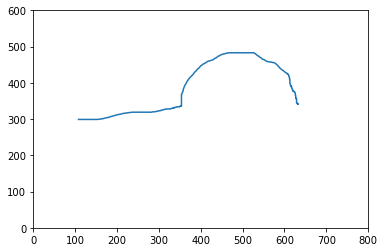

Derivada de grau  1 :


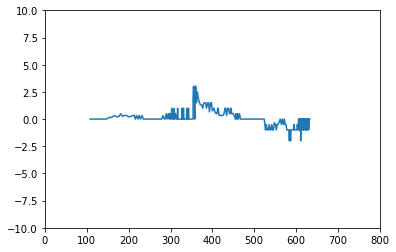

Derivada de grau  2 :


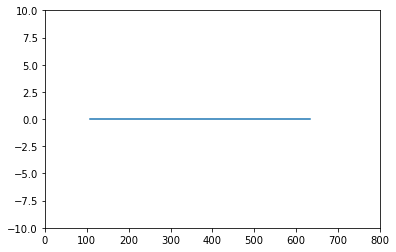

Derivada de grau  3 :


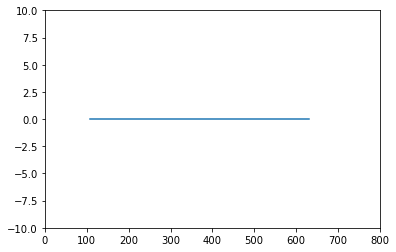

Derivada de grau  4 :


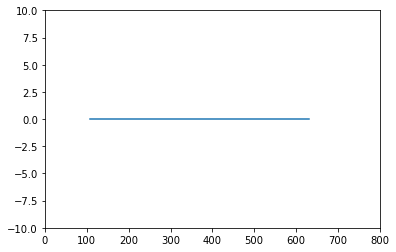

Derivada de grau  5 :


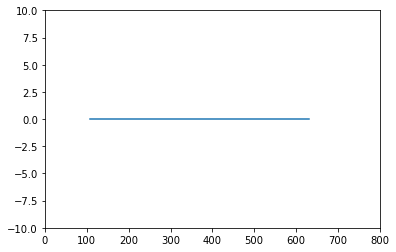

Derivada de grau  6 :


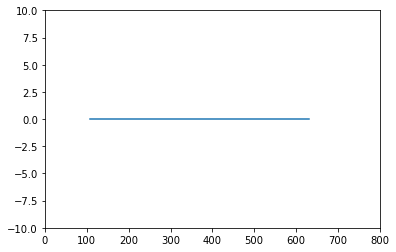

In [14]:
dados = np.load("Dados/foice.npy") 
x_min = x_max = dados[0,0]

plt.figure(6)
plt.plot(dados[:, 0], dados[:, 1])
plt.axis([0, 800, 0, 600])
plt.show()


for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

derivadas = derivada(dados[:, 0], dados[:, 1], 6)
for l in range(0, 6):
    print("Derivada de grau ", l+1,  ":")
    plt.figure(l)
    plt.axis([0, 800, -10, 10])
    nparr = np.array(derivadas[l])
    plt.plot(dados[:nparr.shape[0], 0], nparr)
    plt.show()


   ### O resultado obtido foi simplesmente péssimo!
   
       Esperava conseguir visualizar o comportamente da função apenas pelo meu método pra definir derivadas. Mas ainda há esperanças! Um problema que encontrei logo na primeira excução do método foi o de divisão por zero, ou seja, vários pares x[i+1]==x[i], nesses casos pedi para que a derivada no ponto valesse zero. Além disso, outra ocorrência normal nos dados eram casos em que o x era diferente, mas o y era igual. Ou seja, temos muitas derivadas zero! E essas derivadas zero logo na primeira derivada acabam carregando o zero para as de grau maior. Creio que o meu problema de abordar dessa forma é: estou querendo derivadas muito específicas em intervalos muito curtos. Somente na imagem da foice temos aproximadamente 500 pontos, e todos estes pertencem aos inteiros, ou seja temos pouca possibilidade de variação em um pequeno intervalo de amostragem. Minha próxima tentativa será reduzir a amostragem. A cada quinze pontos, captarei somente 1, dessa forma a primeira derivada de um ponto resume a derivada de dez pontos. 

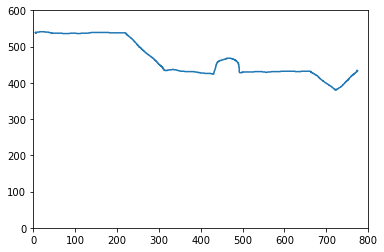

Derivada de grau  1 :


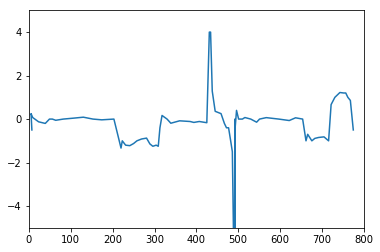

In [15]:
def reduzir_dados(dados):
    removidos = []
    
    for i in range(0, dados.shape[0]-1):
        if(i%15!=0):
            removidos.append(i)
    return np.delete(dados, removidos, 0)


dados = np.load("Dados/teste_interpol.npy") 
x_min = x_max = dados[0,0]
dados_reduzido = reduzir_dados(dados)


plt.figure(0)
plt.plot(dados[:, 0], dados[:, 1])
plt.axis([0, 800, 0, 600])
plt.show()


for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

derivadas = derivada(dados_reduzido[:, 0], dados_reduzido[:, 1], 1)
print("Derivada de grau ", 1,  ":")
plt.figure(1)
plt.axis([0, 800, -5, 5])
nparr = np.array(derivadas[0])
plt.plot(dados_reduzido[:nparr.shape[0], 0], nparr)
plt.show()


   ### Agora sim  tivemos bons resultados!
   
       Antes até conseguíamos detectar o exato ponto onde a anomalia ocorria, o problema que detectávamos eventos semelhantes em pontos onde não deveria ter nenhuma anomalia. Outro fato importante de constatar é que não usamos as derivadas de grau maior que 1 para nada! Basta agora definir um parâmetro entre a diferença de derivada entre dois pontos consecutivos e usar para identificar os locais de corte para interpolação.
       
       Apenas para deixar claro, no nosso critério de seleção de pontos para interpolação queremos que:
       
    - Todas as mudanças de padrão sejam marcadas
    - o mínimo possível de locais sem mudança de padrão sejam marcados, mas caso ocorram, não irão prejudicar muito pois somente provocam um aumento no overfit.
    
    O critério inicial que selecionei foi: 
        Para toda mudança com valor absoluto superior a 0.7 na derivada será um ponto marcado na interpolação, o próximo ponto provavelmente terá valor absoluto igual, mas agora retornando ao valor médio, por isso será ignorado.

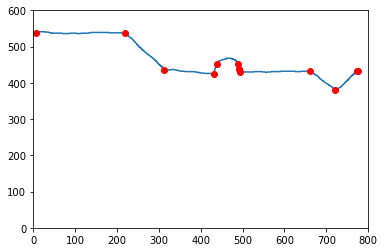

Derivada de grau  1 :


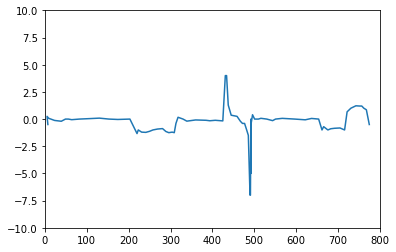

In [113]:
def identifica_interpol(derivadas, dados_reduzido):
    nparr = np.array(derivadas[0])
    selecionados = [dados_reduzido[0]]
    ultimo_sel = False
    for i in range(0, nparr.shape[0]-1):
        if(ultimo_sel):
            ultimo_sel = False
            continue
        if(abs(nparr[i] - nparr[i+1])>0.7):
            if(len(selecionados)==1 and abs(dados_reduzido[i+1, 0] - selecionados[0][0]) < 15 ): #se for o segundo ponto a ser inserido e sua distância é inferior a 15 pixels
                continue
            selecionados.append(dados_reduzido[i+1])
            ultimo_sel = True
        
    selecionados.append(dados_reduzido[dados_reduzido.shape[0]-1])
    return np.array(selecionados)


dados = np.load("Dados/teste_interpol.npy") 
x_min = x_max = dados[0,0]
dados_reduzido = reduzir_dados(dados)

derivadas = derivada(dados_reduzido[:, 0], dados_reduzido[:, 1], 1)
escolhidos = identifica_interpol(derivadas, dados_reduzido)

for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)


plt.figure(0)
plt.plot(dados[:, 0], dados[:, 1])
plt.plot(escolhidos[:, 0], escolhidos[:, 1], "ro")
plt.plot()
plt.axis([0, 800, 0, 600])
plt.show()



print("Derivada de grau ", 1,  ":")
plt.figure(1)
plt.axis([0, 800, -10, 10])
nparr = np.array(derivadas[0])
plt.plot(dados_reduzido[:nparr.shape[0], 0], nparr)
plt.show()


   ### Finalmente, vamos pôr em prática
   
   Agora que selecionamos os pontos para interpolação, poderemos cortar o volume de dados em pedaços menores e aplicar o método de mínimos quadrados neles.

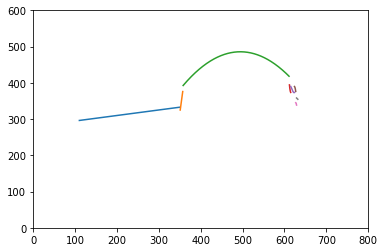

In [119]:
dados = np.load("Dados/foice.npy") 
dados_reduzido = reduzir_dados(dados)

derivadas = derivada(dados_reduzido[:, 0], dados_reduzido[:, 1], 1)
escolhidos = identifica_interpol(derivadas, dados_reduzido)
x_min = x_max = dados[0,0]
for i in dados[:, 0]:
    x_min = min(x_min, i)
    x_max = max(x_max, i)

n = 1
inicio = 0
fim = 0
#plt.plot(dados[:, 0], dados[:, 1])

while(n!=len(escolhidos)):
    elemento = escolhidos[n]
    inicio = fim + 1
    while( (fim!=dados.shape[0]) and ((dados[fim, 0]!=elemento[0]) or dados[fim, 1]!=elemento[1])):
        fim+=1
    resolve_pol(dados[inicio:fim+1, :], 6)
    n+=1
plt.show()


    O resultado foi bem satisfatório, mas ainda sim muitos erros persistem e novos apareceram. Listarei os que identifiquei e suas causas:
    - Para intervalos muito pequenos entre os cortes de interpolação o resultado é muito randomico pois temos a escolha do polinômio sendo feita por casos de treino e teste. Para resolver, creio que o melhor seria evoluir ainda mais o critério de detecção para os pontos a serem interpolados. Além disso, caso ainda assim dois pontos no corte ficassem muito próximos, o melhor seria conectá-los com uma simples reta, já que seu impacto visual é mínimo. (ou entao tirar os casos de teste e treino).
    - No pão de acúcar tive o problema em um corte específico, pois todos os pontos possuem o mesmo x e variavam apenas o y, criando uma matriz impossível como solução. Nesse caso (identificado no início do projeto em análise das retas), o ideal seria tratá-lo manualmente como uma reta. 

#### (essa próxima observação é importante, se ignorou as outras leia pelo menos essa )
    
    - Outro problema encontrado foi: em nenhum momento impusêmos que os polinômios interpolados ficassem conectados, apenas pedíamos ao computador para resolver mínimos quadrados. No entanto, se tentássemos resolver o problema com a interpolação aprendida em aula, teríamos que escolher apenas três pontos para a parábola, que não é o que desejamos. Em resumo, o que queremos é: utilizar o método dos mínimos quadrados COM CONDIÇÃO, que é a do início e fim do polinômio estejam pré-determinados. 
    
    Pensando um pouco na ideia e com a ajuda do meu amigo Lucas Rampazzo (também aluno da disciplina). Nos lembramos que a parábola, por exemplo, pode ser escrita como k(x-a).(x-b) = 0, ou seja, se eu determinar o ponto a e o ponto b, ainda poderei usar o método dos mínimos quadrados para o valor de k. Reduzindo dessa forma o grau de liberdade do polinômio, mas ainda assim proporcionando o efeito visual. Para os polinômios de grau maior teríamos mais liberdade.
    Note que em primeira instância só conseguiríamos impor condições caso elas fossem as raízes do polinômio, mas evoluindo um pouco mais a ideia, a gente chega no seguinte:
    Pense em um polinômio de grau 2, ax²+bx+c no qual queremos aplicar mínimos quadrados, mas uma condição que ele deve seguir é a de que passe em (1, 1) e em (2, 3), logo
    a+b+c= 1    -> c =1-a-b
    4a+2b+c = 3 -> 3a+b = 2
    b = 2-3a
    c = -1+2a
    
    Substituindo em ax²+bx+c = y
    a(x²-3x+2)+2x-1 = y
    a(x²-3x+2) = y-2x+1
    ou seja, nosso vetor x no mínimos quadrados agora é apenas uma constante, o a. O nosso vetor y será acrescido com os valores calculados de -2x+1 e a matriz A será uma linha com os valores calculados de x²-3x+2
    Como pôde se ver, com um sistema algébrico é possível representar essas condições no método dos mínimos quadrados para qualquer grau de polinômio, algo que faremos mais a frente.
    